<a href="https://colab.research.google.com/github/Dongwei-Li-code/Garch/blob/main/option_pricing_based_on_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch historical stock price data and calculate historical volatility


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fetching data for Apple Stocks over 43 years
stock_data = yf.download('AAPL', start='1980-12-12', end='2023-12-08')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [ ]:
# Calculating Daily Log Returns
stock_data['Log_Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Return
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,-0.053581
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,-0.076231
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.024450
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.028580


In [ ]:
# Calculating Historical Volatility
volatility = stock_data['Log_Return'].std() * np.sqrt(252)
print('Historical annualized volatility from 1980 12-12 to 2023-12-07:', volatility)

Historical annualized volatility from 1980 12-12 to 2023-12-07: 0.45181196343661484


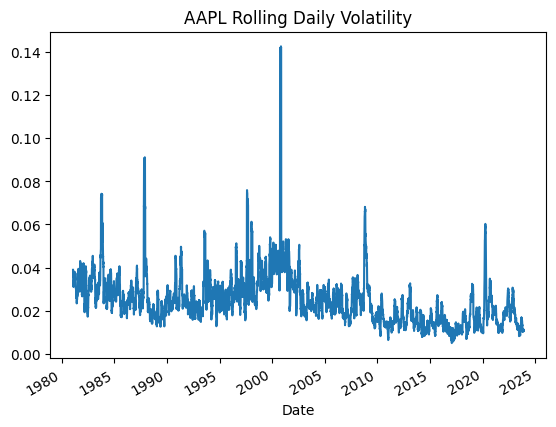

In [ ]:
# Defining the rolling window
window = 30

# Calculating Rolling Daily Volatility
# Using a window of 30 days for the rolling standard deviation
stock_data['Rolling_Volatility'] = stock_data['Log_Return'].rolling(window=window).std()

# Plotting
stock_data['Rolling_Volatility'].plot(title='AAPL Rolling Daily Volatility')
plt.show()

# Implement a GARCH(1,1) model to forecast future volatility.


In [ ]:
calendar_maturity = 43
business_maturity = 28
prediction_interval = 1  # one day prediction
#stock_data = raw_data.iloc[1::business_maturity]
stock_data

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Rolling_Volatility
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,-0.053581,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,-0.076231,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.024450,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.028580,NaN
...,...,...,...,...,...,...,...,...
2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,0.006768,0.010827
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,-0.009510,0.010567
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,0.020844,0.011040


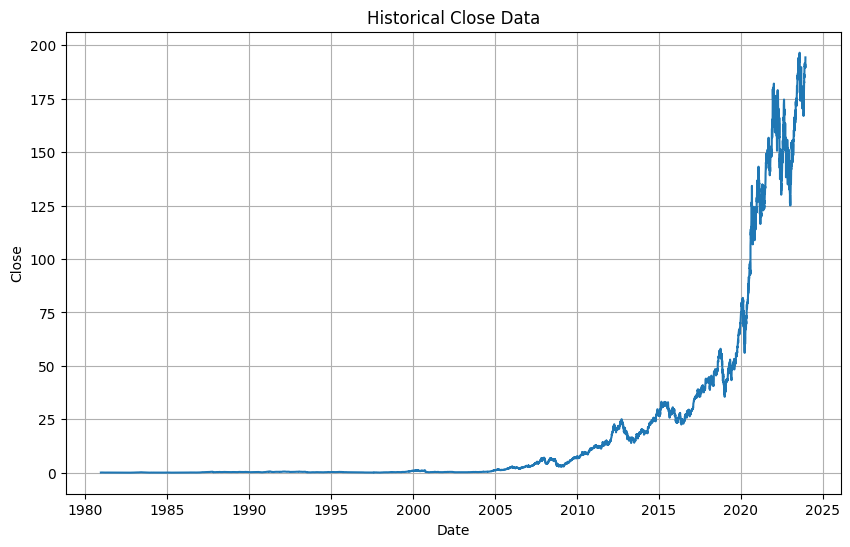

In [ ]:
# Plot the historical volatility data
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data["Close"])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Historical Close Data")
plt.grid(True)

plt.show()

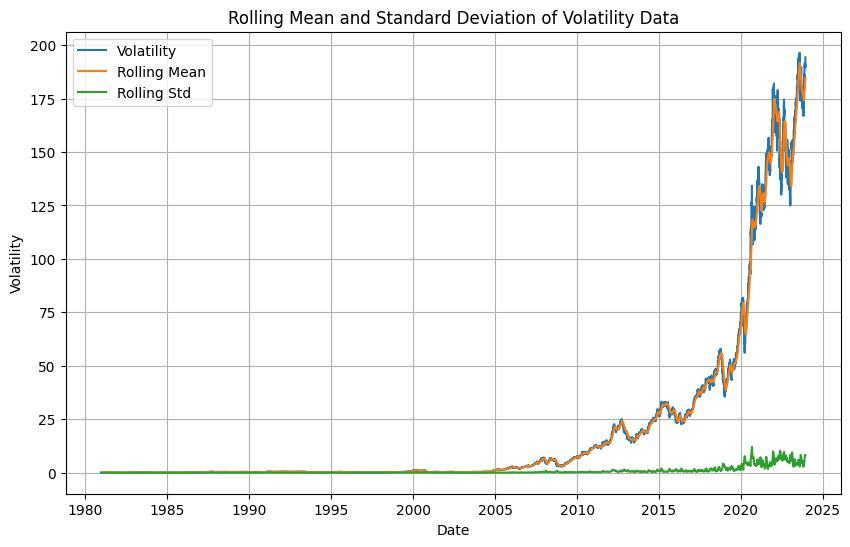

In [ ]:
# Calculate the rolling mean and standard deviation
rolling_mean = stock_data["Close"].rolling(window=30).mean()
rolling_std = stock_data["Close"].rolling(window=30).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data["Close"], label="Volatility")
plt.plot(rolling_mean.index, rolling_mean, label="Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label="Rolling Std")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Mean and Standard Deviation of Volatility Data")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install pandas arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
returns = np.log(stock_data["Close"]).diff().dropna()
# Fit the GARCH(1, 1) model
model = arch_model(returns, vol="Garch", p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 31390136612.940117
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1.7005390406750802e+18
Optimization terminated successfully    (Exit mode 0)
            Current function value: -24570.38315139468
            Iterations: 2
            Function evaluations: 30
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008101. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
results.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                24570.4
Distribution:                  Normal   AIC:                          -49132.8
Method:            Maximum Likelihood   BIC:                          -49103.6
                                        No. Observations:                10837
Date:                Tue, Dec 19 2023   Df Residuals:                    10836
Time:                        02:27:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6273

In [ ]:
results.arch_lm_test()

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 74.2359
P-value: 0.0006
Distributed: chi2(39)
WaldTestStatistic, id: 0x7b587b732560

In [ ]:
# Estimate the volatility
volatility = results.conditional_volatility
volatility

Date
1980-12-15    0.042798
1980-12-16    0.043965
1980-12-17    0.048201
1980-12-18    0.045965
1980-12-19    0.044138
                ...   
2023-12-01    0.013506
2023-12-04    0.013393
2023-12-05    0.013655
2023-12-06    0.014738
2023-12-07    0.014585
Name: cond_vol, Length: 10837, dtype: float64

In [ ]:
# Annualize the estimated volatility
volatility_annualized = volatility*np.sqrt(252/prediction_interval)
volatility_annualized

Date
1980-12-15    0.679400
1980-12-16    0.697915
1980-12-17    0.765166
1980-12-18    0.729678
1980-12-19    0.700663
                ...   
2023-12-01    0.214403
2023-12-04    0.212607
2023-12-05    0.216764
2023-12-06    0.233961
2023-12-07    0.231531
Name: cond_vol, Length: 10837, dtype: float64

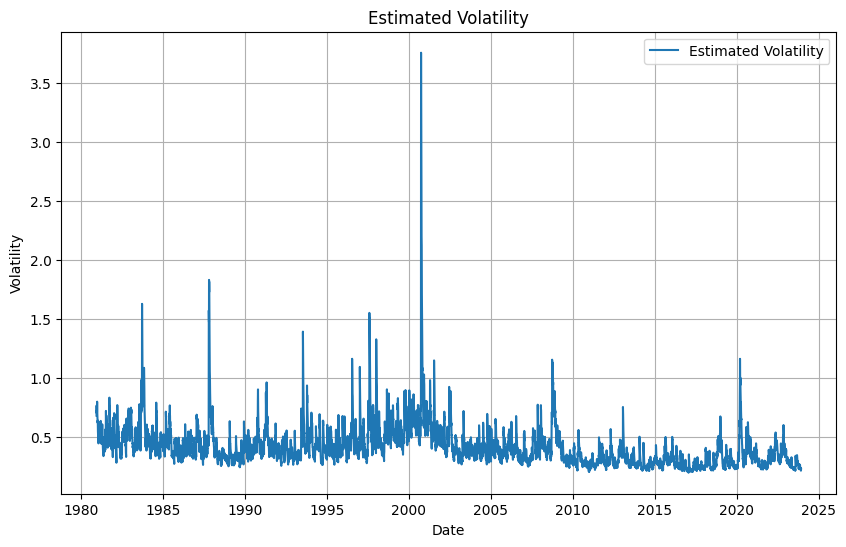

In [ ]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility_annualized, label="Estimated Volatility")
#plt.plot(returns.index, returns, label="Actual Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Estimated Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
#forecast_volatility = forecast.variance.dropna().values.flatten()
forecast_volatility = forecast.variance.dropna()

In [ ]:
forecast_volatility

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-15,0.001931,0.001909,0.001887,0.001865,0.001844,0.001823,0.001803,0.001783,0.001764,0.001745,...,0.001558,0.001543,0.001529,0.001514,0.001500,0.001487,0.001473,0.001460,0.001447,0.001434
1980-12-16,0.002322,0.002291,0.002262,0.002233,0.002204,0.002176,0.002149,0.002122,0.002096,0.002070,...,0.001819,0.001799,0.001779,0.001760,0.001741,0.001722,0.001704,0.001686,0.001669,0.001652
1980-12-17,0.002111,0.002085,0.002060,0.002035,0.002010,0.001986,0.001963,0.001940,0.001917,0.001895,...,0.001679,0.001661,0.001644,0.001628,0.001611,0.001595,0.001580,0.001564,0.001549,0.001534
1980-12-18,0.001947,0.001924,0.001902,0.001880,0.001859,0.001838,0.001817,0.001797,0.001777,0.001758,...,0.001569,0.001554,0.001539,0.001524,0.001510,0.001496,0.001482,0.001469,0.001456,0.001443
1980-12-19,0.002061,0.002036,0.002012,0.001988,0.001964,0.001941,0.001919,0.001896,0.001875,0.001853,...,0.001645,0.001629,0.001612,0.001596,0.001581,0.001565,0.001550,0.001535,0.001521,0.001507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,0.000179,0.000192,0.000204,0.000216,0.000228,0.000240,0.000251,0.000263,0.000274,0.000284,...,0.000389,0.000397,0.000406,0.000414,0.000422,0.000430,0.000437,0.000445,0.000452,0.000459
2023-12-04,0.000186,0.000199,0.000211,0.000223,0.000235,0.000246,0.000258,0.000269,0.000280,0.000290,...,0.000394,0.000402,0.000410,0.000418,0.000426,0.000434,0.000441,0.000449,0.000456,0.000463
2023-12-05,0.000217,0.000229,0.000241,0.000252,0.000263,0.000274,0.000285,0.000295,0.000306,0.000316,...,0.000414,0.000422,0.000430,0.000438,0.000445,0.000452,0.000459,0.000467,0.000473,0.000480


In [ ]:
np.sqrt(forecast_volatility.loc['2023-12-07','h.01']*252/prediction_interval)

0.2303496310686285

# Use the forecasted volatility in the Black-Scholes model to price options and compare with market prices.

In [ ]:
import math
from scipy.stats import norm

In [ ]:
def bsmodel(K, Sn, r, T, sigma, q, option):
    d1 = (math.log(Sn / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if(option == 'call'):
        price = Sn *  math.exp(-q * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif(option == 'put'):
        price = K * math.exp(-r * T) * norm.cdf(-d2) - Sn * math.exp(-q * T) * norm.cdf(-d1)
    return price

In [ ]:
T = 1/12
Sn = 195.71
r = 0.0554
q = 0.0049
sigma = np.sqrt(forecast_volatility.loc['2023-12-06','h.01']*252/prediction_interval)

In [ ]:
# Testing BS Model for Call Option Price
K = 120.00
call_price = bsmodel(K, Sn, r, T, sigma, q, 'call')
print(call_price)

76.18282454609587


In [ ]:
# Testing BS Model for Put Option Price
K = 70.00
put_price = bsmodel(K, Sn, r, T, sigma, q, 'put')
print(round(put_price, 4))

0.0


In [ ]:
import os
if not os.path.isfile('AAPL_call_20231207.csv'):
  !wget https://raw.githubusercontent.com/Dongwei-Li-code/Garch/main/AAPL_call_20231207.csv
else:
  print('data already existed.')
if not os.path.isfile('AAPL_put_20231207.csv'):
  !wget https://raw.githubusercontent.com/Dongwei-Li-code/Garch/main/AAPL_put_20231207.csv
else:
  print('data already existed.')

--2023-12-19 02:27:23--  https://raw.githubusercontent.com/Dongwei-Li-code/Garch/main/AAPL_call_20231207.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6910 (6.7K) [text/plain]
Saving to: ‘AAPL_call_20231207.csv’

AAPL_call_20231207. 100%[===================>]   6.75K  --.-KB/s    in 0s      

2023-12-19 02:27:23 (55.8 MB/s) - ‘AAPL_call_20231207.csv’ saved [6910/6910]

--2023-12-19 02:27:23--  https://raw.githubusercontent.com/Dongwei-Li-code/Garch/main/AAPL_put_20231207.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67

In [ ]:
call_option_raw = pd.read_csv('AAPL_call_20231207.csv',index_col=0)
put_option_raw = pd.read_csv('AAPL_put_20231207.csv',index_col=0)

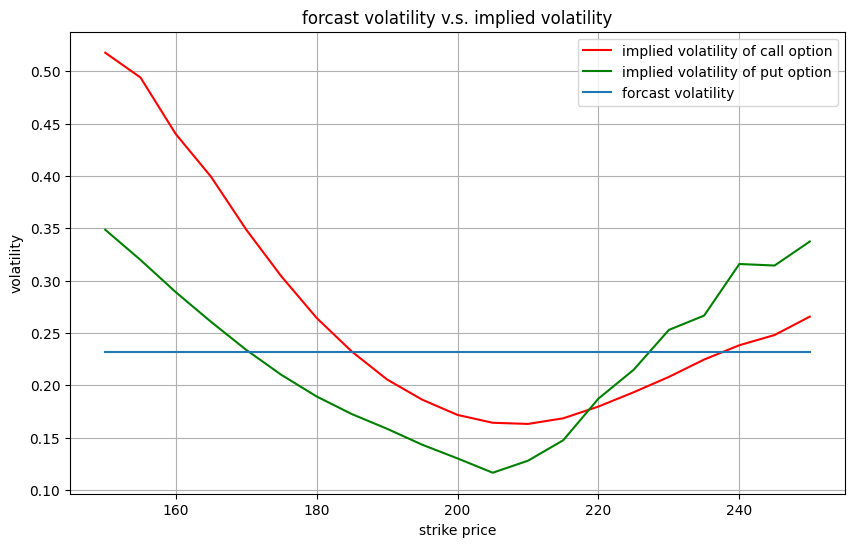

In [ ]:
call_imval = call_option_raw.loc[:,['strike','impliedVolatility']].set_index('strike').loc[150:250,:]
call_imval.loc[:,'forcast_volatility'] = sigma
put_imval = put_option_raw.loc[:,['strike','impliedVolatility']].set_index('strike').loc[150:250,:]

plt.figure(figsize=(10, 6))
plt.plot(call_imval["impliedVolatility"], label="implied volatility of call option", color='red')
plt.plot(put_imval['impliedVolatility'], label="implied volatility of put option", color='green')
plt.plot(call_imval['forcast_volatility'], label="forcast volatility")
plt.title("forcast volatility v.s. implied volatility")
plt.xlabel("strike price")
plt.ylabel("volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
call_option_raw.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240119C00050000,2023-11-28 20:50:00+00:00,50.0,140.55,144.35,144.65,0.000000,0.000000,1,16866,1.753907,True,REGULAR,USD
1,AAPL240119C00055000,2023-11-22 20:09:04+00:00,55.0,136.80,139.45,139.65,0.000000,0.000000,1,3355,1.674806,True,REGULAR,USD
2,AAPL240119C00060000,2023-12-05 15:46:01+00:00,60.0,134.40,134.45,134.70,0.000000,0.000000,1,1817,1.582033,True,REGULAR,USD
3,AAPL240119C00065000,2023-11-21 20:17:31+00:00,65.0,126.31,129.45,129.70,0.000000,0.000000,40,1875,1.480471,True,REGULAR,USD
4,AAPL240119C00070000,2023-12-07 17:26:49+00:00,70.0,125.25,124.55,124.75,1.650001,1.334953,1,2034,1.427737,True,REGULAR,USD


In [ ]:
selected_columns = ['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'inTheMoney', 'contractSize']
call_option = call_option_raw[selected_columns]
call_option.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,inTheMoney,contractSize
0,AAPL240119C00050000,2023-11-28 20:50:00+00:00,50.0,140.55,144.35,144.65,True,REGULAR
1,AAPL240119C00055000,2023-11-22 20:09:04+00:00,55.0,136.80,139.45,139.65,True,REGULAR
2,AAPL240119C00060000,2023-12-05 15:46:01+00:00,60.0,134.40,134.45,134.70,True,REGULAR
3,AAPL240119C00065000,2023-11-21 20:17:31+00:00,65.0,126.31,129.45,129.70,True,REGULAR
4,AAPL240119C00070000,2023-12-07 17:26:49+00:00,70.0,125.25,124.55,124.75,True,REGULAR


In [ ]:
selected_columns = ['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'inTheMoney', 'contractSize']
put_option = put_option_raw[selected_columns]
put_option.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,inTheMoney,contractSize
0,AAPL240119P00050000,2023-11-29 18:31:45+00:00,50.0,0.01,0.0,0.01,False,REGULAR
1,AAPL240119P00055000,2023-12-01 16:46:43+00:00,55.0,0.01,0.0,0.01,False,REGULAR
2,AAPL240119P00060000,2023-11-15 19:49:13+00:00,60.0,0.01,0.0,0.01,False,REGULAR
3,AAPL240119P00065000,2023-12-05 14:56:38+00:00,65.0,0.01,0.0,0.01,False,REGULAR
4,AAPL240119P00070000,2023-12-04 14:44:03+00:00,70.0,0.01,0.0,0.01,False,REGULAR


In [ ]:
call_option['BS_Calc_Price'] = call_option['strike'].apply(lambda x: bsmodel(x, Sn, r, T, sigma, q, 'call'))
call_option.head()

<ipython-input-32-7007e7e91dc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_option['BS_Calc_Price'] = call_option['strike'].apply(lambda x: bsmodel(x, Sn, r, T, sigma, q, 'call'))


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,inTheMoney,contractSize,BS_Calc_Price
0,AAPL240119C00050000,2023-11-28 20:50:00+00:00,50.0,140.55,144.35,144.65,True,REGULAR,145.860403
1,AAPL240119C00055000,2023-11-22 20:09:04+00:00,55.0,136.80,139.45,139.65,True,REGULAR,140.883433
2,AAPL240119C00060000,2023-12-05 15:46:01+00:00,60.0,134.40,134.45,134.70,True,REGULAR,135.906463
3,AAPL240119C00065000,2023-11-21 20:17:31+00:00,65.0,126.31,129.45,129.70,True,REGULAR,130.929493
4,AAPL240119C00070000,2023-12-07 17:26:49+00:00,70.0,125.25,124.55,124.75,True,REGULAR,125.952523


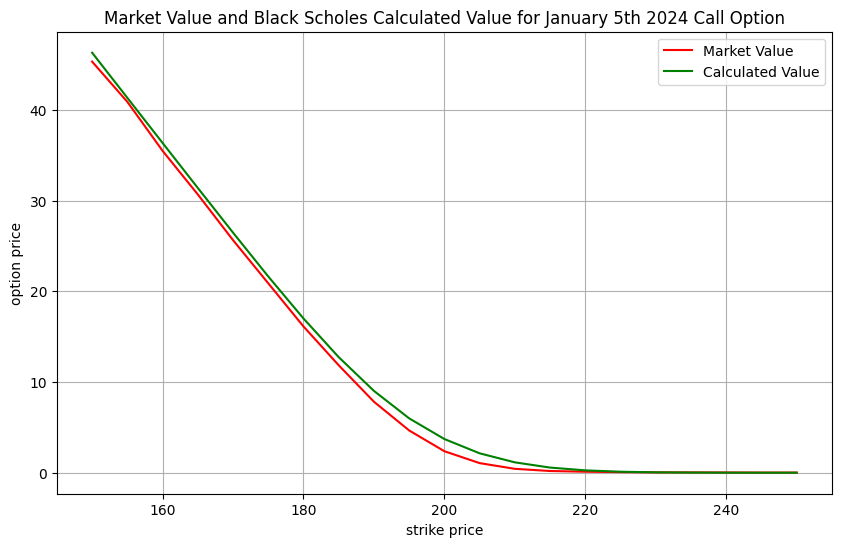

In [ ]:
call_option = call_option.set_index('strike')
call_option = call_option.loc[150:250,:]

plt.figure(figsize=(10, 6))
plt.plot(call_option["lastPrice"], label="Market Value", color='red')
plt.plot(call_option['BS_Calc_Price'], label="Calculated Value", color='green')
plt.title("Market Value and Black Scholes Calculated Value for January 5th 2024 Call Option")
plt.xlabel("strike price")
plt.ylabel("option price")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
put_option['BS_Calc_Price'] = round(put_option['strike'].apply(lambda x: bsmodel(x, Sn, r, T, sigma, q, 'put')), 4)
put_option.head()

<ipython-input-34-b781da6a6f7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  put_option['BS_Calc_Price'] = round(put_option['strike'].apply(lambda x: bsmodel(x, Sn, r, T, sigma, q, 'put')), 4)


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,inTheMoney,contractSize,BS_Calc_Price
0,AAPL240119P00050000,2023-11-29 18:31:45+00:00,50.0,0.01,0.0,0.01,False,REGULAR,0.0
1,AAPL240119P00055000,2023-12-01 16:46:43+00:00,55.0,0.01,0.0,0.01,False,REGULAR,0.0
2,AAPL240119P00060000,2023-11-15 19:49:13+00:00,60.0,0.01,0.0,0.01,False,REGULAR,0.0
3,AAPL240119P00065000,2023-12-05 14:56:38+00:00,65.0,0.01,0.0,0.01,False,REGULAR,0.0
4,AAPL240119P00070000,2023-12-04 14:44:03+00:00,70.0,0.01,0.0,0.01,False,REGULAR,0.0


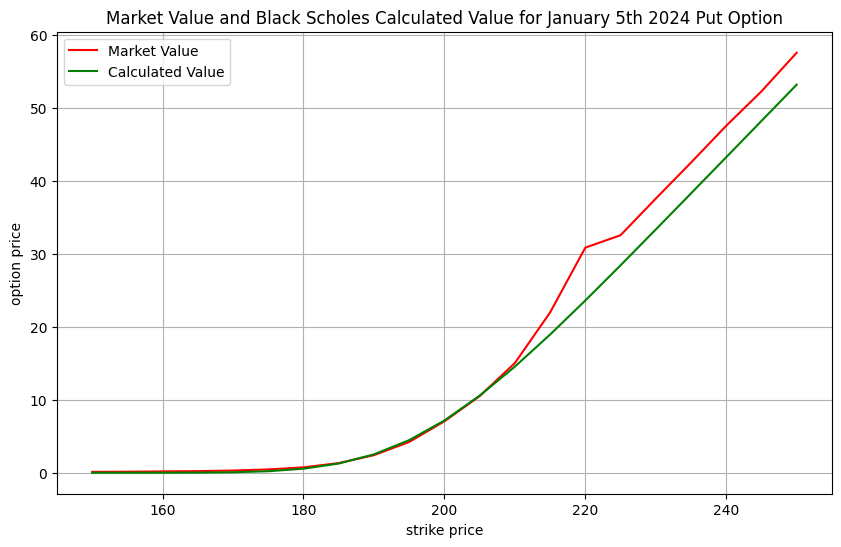

In [ ]:
put_option = put_option.set_index('strike')
put_option = put_option.loc[150:250,:]

plt.figure(figsize=(10, 6))
plt.plot(put_option["lastPrice"], label="Market Value", color='red')
plt.plot(put_option['BS_Calc_Price'], label="Calculated Value", color='green')
plt.title("Market Value and Black Scholes Calculated Value for January 5th 2024 Put Option")
plt.xlabel("strike price")
plt.ylabel("option price")
plt.legend()
plt.grid(True)

plt.show()